# Intorduction To Scikit-Learn 

This notebook demonstrates some of the most useful functions of 
the beautiful Scikit-Learn Library.

What we're going to cover:

0. An end-to-end Scikit-Learn Workfloe
1. Getting the data ready.
2. Choose the right estimator/algorithm for our problems.
3. Fit the model/ algorithm and use it to make predictions on our data
4. Evaluating a model 
5. Improve a model 
6. Save and load trained model
7. Putting it all together.
---

## Data Preprocessing

## 1. Getting the data Ready

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

### 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Filling (also called imputing) or disregarding missing values
    2. Converting non-numerical values to numerical values(also called feature encodin) 
    3. Split the data into features into label ( Usually "X" & "y")
    

### 1.1 Filling missing values

Two ways:
* Fill them with come values(also known as imputation)
* Remove the samples with missing data altogether

In [2]:
# Import car Sales data with missing values

car_sales = pd.read_csv("car-sales-extended.csv")

### Opriton 1: Fill missing data with Pandas

In [ ]:
# Fill the "Make" column
car_sales["Make"].fillna("missing", inplace = True)

# Fill the "Colour" column
car_sales["Colour"].fillna("missing", inplace = True)

# Fill the "Doors" column
car_sales["Doors"].fillna(4, inplace = True)

# Fill the "Odometer " column
car_sales["Odometer (KM)"].fillna(car_sales["Odometer (KM)"].mean(), inplace = True)

car_sales.isna().sum()

In [ ]:
# Remove rows with missing Price value
car_sales.dropna(inplace=True)
car_sales.isna().sum()

In [ ]:
len(car_sales)


### Option 2 : Fiill missing Values with Scikit-Learn

In [ ]:
# Drop the rows with no labels (Price)

car_sales.dropna(subset=["Price"],inplace=True)
car_sales.isna().sum()

In [ ]:
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]


In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Filling Categorical values with "Missing" & Numberical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy= "constant" , fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns 
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create and imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X = pd.DataFrame(filled_X,
                columns=["Make","Colour","Doors","Odometer (KM)"])

## 1.2 Chaging Values into numbers

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(filled_X)


![](one.png)

In [ ]:
# Another method of changing values to number
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])


## 1.3 Splitting data into test and train

In [ ]:

# Splitting into training and test sets

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)


### Building and testin Model

In [ ]:
#Build machine learning model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

## 2. Choosing the right estimator/ algorithm for our problem

* Scikit-Learn uses estimator as another term for machine learning model or algorithm
---

* Classification
: Predicting whether a sample is one thing or another

* Regression
: Predicting a number
---
- Step 1 - Check the Scikit-Learn Machine Learning map

![](ml_map.png)
[MAP](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### 2.1 Picking a machine learning model for a regression problem

In [3]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
# Let's try the Ridge model

from sklearn.linear_model import Ridge

# Setup a random Seed
np.random.seed(42)

# Splitting the data into X and Y
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Splitting the data  into test and train sets
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size=0.2)

#Instantiate Ridge model
model = Ridge()
model.fit(X_train,y_train)

# Checking the score  of the Ridge model on test Data
model.score(X_test,y_test)

0.6662221670168522

How do we improve the score?

What if the Ridge wasn't working

Lets refer back to the map

In [28]:
# Let's Try the Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Setup a random Seed
np.random.seed(42)

# Splitting the data into X and Y
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Splitting the data  into test and train sets
# X_train, X_test , y_train , y_test = train_test_split(X,y , test_size=0.2)

#Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

# Checking the score  of the Ridge model on test Data
rf.score(X_test,y_test)

0.8896648705127477

### 2.2 Choosing a Classifier for Classification Problem

In [4]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try `LinearSVC`.

In [49]:
# Import the linearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target',axis=1)
y = heart_disease["target"]

# Splitting into test and train
X_train ,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train,y_train)

# Evaluating the LinearSVC
clf.score(X_test,y_test)

/home/laraib_sidd/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8688524590163934

In [42]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [50]:
# Import the linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target',axis=1)
y = heart_disease["target"]

# Splitting into test and train
X_train ,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Clasifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluating the Random Forest Clasgier
clf.score(X_test,y_test)

0.8524590163934426

Tidbit:
    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variable,data
* `y` = labels, target,target variables

In [3]:
# Import the linearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target',axis=1)
y = heart_disease["target"]

# Splitting into test and train
X_train ,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Clasifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train,y_train)

# Evaluating the Random Forest Clasgier (Use the patterns the model has learnt)
clf.score(X_test,y_test)

0.8524590163934426

### 3.2 Making predictions using the machine  learning model

2 Ways to make predictions:
1. `predict()`
2. `predict_proba()`

## Classification Problem

In [7]:
# Use a trained model to make predictions
y_preds = clf.predict(X_test)

In [11]:
# Compare predictions to truth labels to evaluate the model
np.mean(y_preds == y_test)

0.8524590163934426

In [12]:
# Another way
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make Predictions with `predict_proba()`


In [16]:
# Predict_proba() returns probabliites
clf.predict_proba(X_test)[:5]

# It returns the probability of the labels

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [17]:
# Let's predict() on the same data
clf.predict(X_test)[:5]

array([0, 1, 1, 0, 1])

## Regression Problem

`predict` can also be use for regression models

In [84]:
# Let's Try the Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Setup a random Seed
np.random.seed(32)

# Splitting the data into X and Y
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Splitting the data  into test and train sets
# X_train, X_test , y_train , y_test = train_test_split(X,y , test_size=0.2)

#Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

# Make predictions
y_preds = rf.predict(X_test)

In [85]:
y_preds[:10]

array([22.66 , 31.284, 16.659, 23.382, 16.181, 21.141, 19.076, 15.635,
       21.487, 20.853])

In [86]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [87]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_preds)

2.014019607843138

 ## 4. Evaluating a machine learning model
 
 Three ways to evaluate Scikit-Learn models/estimatore:
 1. Estimator `score` method
 2. The `scoring` parameter
 3. Problem-Specific metric functions
     

In [95]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(2948)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier().fit(X_train,y_train)

### 4.1 `score` method

In [96]:
clf.score(X_test,y_test)

0.9016393442622951

Let's do the same but for regression..

In [105]:
# Let's Try the Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Setup a random Seed
np.random.seed(97)

# Splitting the data into X and Y
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Splitting the data  into test and train sets
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size=0.2)

#Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train);

In [108]:
rf.score(X_test,y_test)

0.9358413444559672

### 4.2 Evaluating a using the `scoring` parameter

In [113]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier().fit(X_train,y_train)

In [114]:
clf.score(X_test,y_test)

0.8524590163934426

In [123]:
cross_val_score(clf,X,y)

array([0.83606557, 0.8852459 , 0.80327869, 0.8       , 0.78333333])

![](cross.png)

In [125]:
np.random.seed(42)

# single training and test split score

clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y))

# compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [132]:
# Default scoring parameter of classsifier = mean accuracy
clf.score()

In [ ]:
# Scoring parameter is set to None by Default
cross_val_score(X,y,scoring=None)  

### 4.2.1 Classification model evalutaion metrics

1. Accuracy 
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

cross = cross_val_score(clf,X,y , cv=5)

In [29]:
np.mean(cross)

0.8248087431693989

In [30]:
print(f"Heart Diesease Classfier Corss-Valiated-Accuracy {round(np.mean(cross)*100,ndigits=2)}%")

Heart Diesease Classfier Corss-Valiated-Accuracy 82.48%


**Area under the Receiver operating Curve(AUC/ROC)**

* Area Under Curve(AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate(fpr)

* True positive = model predicts 1 when truth is 1 
* Flase positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative =  model predicts 0 when truth is 1

In [31]:
# Create test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilites
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [33]:
y_probs_positive = y_probs[:,1] 

In [34]:
# Calculate fpr,tpr,thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

# Checking the false positive rate thresholds
fpr[:5],tpr[:5],thresholds[:5]

(array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276]),
 array([0.    , 0.    , 0.125 , 0.1875, 0.25  ]),
 array([2.  , 1.  , 0.98, 0.95, 0.92]))

In [35]:
# Create a function for plotting ROC Curve

def plot_roc_curve(fpr,tpr):
    """
    Plots a Roc curve given the false postive rate(fpr)
    and true positive rate (tpr) of a model
    """
    # Plot the roc curve
    plt.plot(fpr,tpr,color="orange",label="Roc")
    
    # Plot line with no predictive power()
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characterstics")
    plt.legend()
    plt.show()    

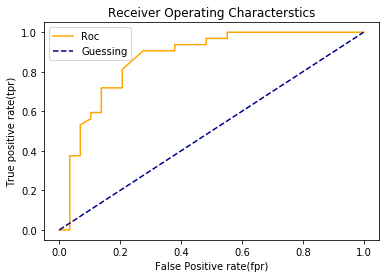

In [36]:
plot_roc_curve(fpr,tpr)

In [37]:
from sklearn.metrics import roc_auc_score
# Area under curve(auc)

roc_auc_score(y_test,y_probs_positive )

0.8669181034482759

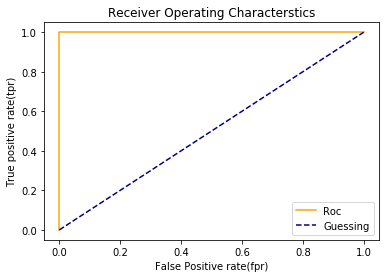

In [38]:
# plot perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [39]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

### Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence giving you an idea  where the model is getting confused.


In [40]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

# Confusion Matrix
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [41]:
# Visualise confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual label,,
0,23,6
1,6,26


![](con.png)

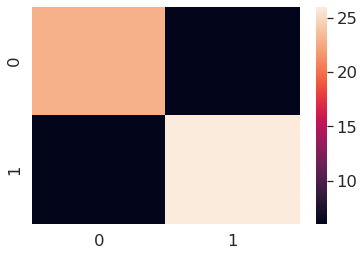

In [42]:
# Make our confusion matri more visual with seaborn's heatmap
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

In [43]:
# Making a function for confusion matrix plotting
def plot_conf_mat(conf_mat):
    """
    Plots a confusion Matrix usinf Seaborn's heatmap().
    """
    
    fig,ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(conf_mat,
                    annot=True, #Annotate the boxes with conf_mat info
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
                    

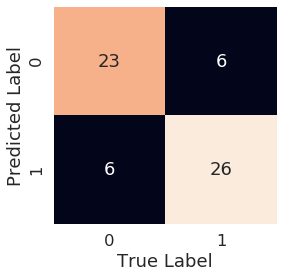

In [44]:

plot_conf_mat(conf_mat)

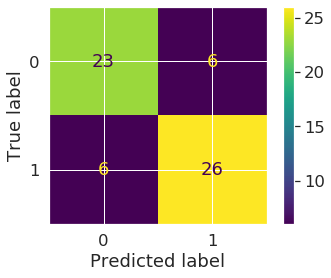

In [45]:
# Plotting Confusion matrix using sklearn

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test);

### Classification Report

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds) )

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



![](report.png)

In [47]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[2] = 1 # only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,
                                  output_dict = True))

/home/laraib_sidd/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
* **Accuracy** is a good measure to start with if all classes are balanced (e.g same amount of samples which are labelled with 0 or 1.).

* **Precision and **recall** become more importan when classed are imbalanced.

* If false positive predictions are worse than false negative , aim for higher precision

* If flase negative predictions are worse than flase positives , aim for higher recall .

* **F1-Score** is a combination of precision and recall

### 4.2 Regression Model evalutaion metrics

[Model evalutaion metrics documentation ](https://scikit-learn.org/stable/modules/model_evaluation.html)

1. R^2 or coefficient of determination
2. Mean absoute error (MAB)
3. Mean squared error (MSE)

### **R^2 Method**

What R-Squared does:
>Compares your model predictions to the mean of the targets . Value can range from negative infinity (a very poor model ) to 1. For example , if all your model does is  predict the mean of the targets , its R^2 value would be 0. And if your perfectly predicts a range of numbers its R^2 value would be 1.



In [6]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor().fit(X_train,y_train)

In [7]:
model.score(X_test,y_test)

0.873969014117403

In [8]:
from sklearn.metrics import r2_score

# Fill an array with y_tes mean 
y_test_mean = np.full(len(y_test),y_test.mean())

In [9]:
y_test.mean()

21.488235294117654

In [10]:
r2_score(y_test,y_test_mean)

2.220446049250313e-16

In [11]:
r2_score(y_test,y_test)

1.0

### Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and actual values. It
gives you an idea of how wrong your models predictions.

In [12]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [13]:
df = pd.DataFrame({"Actual values": y_test,
                  "Predictied Values":y_preds})
df["differences"] = df["Predictied Values"]-df["Actual values"]
df.head()

,Actual values,Predictied Values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753


In [14]:
df.differences.mad()

2.1257145328719735

#### Mean Squared Error(MSE)


In [15]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

9.242328990196082

In [19]:
# Calculate MSE by hand
np.square(df["differences"]).mean()

9.24232899019608

![](reg.png)

### 4.2.3 Finally using `Scoring` parameter

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()



In [37]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [39]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is {np.mean(cv_acc)*100:.2f}%:")

The cross-validated accuracy is 82.48%:


In [64]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,scoring="accuracy")
print(f"The cross-validated accuracy is {np.mean(cv_acc)*100:.2f}%:")

The cross-validated accuracy is 82.48%:


In [65]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,scoring="accuracy") 
print(f"The cross-validated precision is {np.mean(cv_precision)*100:.2f}%:")

The cross-validated precision is 82.48%:


In [66]:
# Recall
np.random.seed(42)
cv_recal = cross_val_score(clf,X,y,scoring="recall") 
print(f"The cross-validated precision is {np.mean(cv_recal)*100:.2f}%:")

The cross-validated precision is 85.45%:


In [67]:
# F1
np.random.seed(42)
cv_f1 = cross_val_score(clf,X,y,scoring="f1") 
print(f"The cross-validated precision is {np.mean(cv_f1)*100:.2f}%:")

The cross-validated precision is 84.27%:


How about our regression model?

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [71]:
np.random.seed(42)
cross_val_score(model,X,y,scoring="r2").mean()

0.622375083951403

In [79]:
# Mean absolute error
cross_val_score(model,X,y,scoring="neg_mean_absolute_error").mean()

-3.00661300718307

In [80]:
# Mean Squared error
cross_val_score(model,X,y,scoring="neg_mean_squared_error").mean()

-21.507177393321676

### 4.3 Using different evalutaion metrics as Scikit-Learn functions

**Classification Evalutaion Functions**

In [9]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf =RandomForestClassifier().fit(X_train,y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the the set")
print(f"Accuracy : {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precisio : {precision_score(y_test,y_preds)}")
print(f"Recall : {recall_score(y_test,y_preds)}")
print(f"F1 : {f1_score(y_test,y_preds)}")

Classifier metrics on the the set
Accuracy : 85.25%
Precisio : 0.8484848484848485
Recall : 0.875
F1 : 0.8615384615384615


**Regression Evaluation Function**

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf =RandomForestRegressor().fit(X_train,y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Regressor metrics on the the set")
print(f"Mean Absolute : {mean_absolute_error(y_test,y_preds)}")
print(f"Mean Squared Score : {mean_squared_error(y_test,y_preds)}")
print(f"R-squared : {r2_score(y_test,y_preds)*100:.2f}%")


Regressor metrics on the the set
Mean Absolute : 2.1226372549019623
Mean Squared Score : 9.242328990196082
R-squared : 87.40%


## 5. Imporving a Model

First predictions = baseline predictions\
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally , the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we can use?
* Could we improve the current model?

**HyperParameters vs Parameters**\
Parameters
: model find these patterns in data

Hyper Parameters
: Settings on a model you can adjust to (potentially) improve its ability to find the patterns.

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()


In [6]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

![](hyper.png)

### 5.1 Tuning hyperparameters by hand
![](val.png)
**Let's Make 3 sets,training,validation and test.**

We're going to try and adjust:
* `Max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [69]:
def evaluate_preds(y_true,y_preds):
    '''
    Performms evalutaion comparison on y_ture labels vs y_preds labels
    on a classification model.
    '''
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict={"accuracy" : round(accuracy,2),
                 "precision" : round(precision,2),
                "recall": round(recall,2),
                "f1" : round(f1,2)}
    print(f"Acc : {accuracy*100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 Score : {f1:.2f}")
    return metric_dict

In [75]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

clf = RandomForestClassifier( )
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc : 82.22%
Precision : 0.81
Recall : 0.88
F1 Score : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [93]:
clf_3=RandomForestClassifier(max_depth=5)
clf_3.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf_3.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc : 86.67%
Precision : 0.83
Recall : 0.96
F1 Score : 0.89


{'accuracy': 0.87, 'precision': 0.83, 'recall': 0.96, 'f1': 0.89}

### 5.2 Hyperparameters tuning with RandomizedSearchCV



In [88]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.2s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   39.8s finished


In [89]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [102]:
# Make predictions with the best hypreparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc : 81.97%
Precision : 0.77
Recall : 0.86
F1 Score : 0.81


In [108]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

### 5.3 HyperParameters tuning with GridSearchCV

In [109]:
grid 

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [111]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [ 6],
         'min_samples_leaf': [1, 2]}

In [117]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2, 
                            cv=5,
                            verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   37.6s finished


In [118]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [128]:
gs_y_preds  = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc : 78.69%
Precision : 0.74
Recall : 0.82
F1 Score : 0.78


In [153]:
np.random.seed(42)
clf_4=RandomForestClassifier(max_depth = None,
                             max_features = 'sqrt',
                             min_samples_leaf = 1,
                             min_samples_split = 6,
                             n_estimators =200)
clf_4.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf_4.predict(X_valid)
print(clf_4.score(X_test,y_test))

# Evaluate the classifier on validation set
clf4_met = evaluate_preds(y_valid, y_preds)


0.8032786885245902
Acc : 88.89%
Precision : 0.86
Recall : 0.96
F1 Score : 0.91


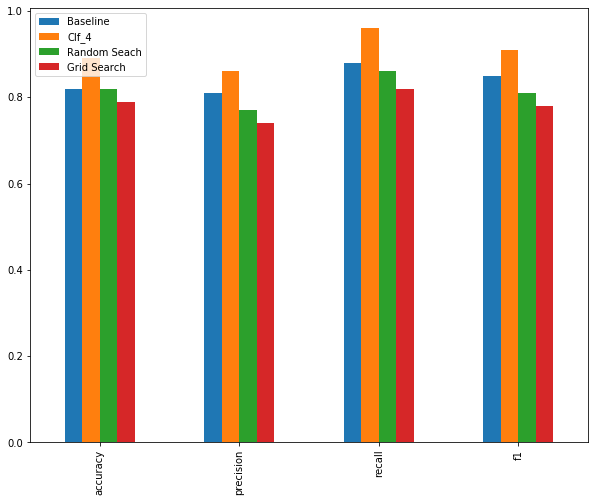

In [149]:
compare_metrics = pd.DataFrame({"Baseline":baseline_metics,
                               "Clf_4":clf4_met,
                               "Random Seach":rs_metrics,
                               "Grid Search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machile learning models:
1. With python's `pickle` model
2. With the `joblib` model

**With `Pickle`**

In [154]:
import pickle

# Save an existing model to file
pickle.dump(clf_4,open('final_model.pkl','wb'))

In [155]:
# Load a saved model
load_pickle_model = pickle.load(open("final_model.pkl","rb"))

In [161]:
pickle_y_preds = load_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc : 80.33%
Precision : 0.75
Recall : 0.86
F1 Score : 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

**With `Joblib`**

In [157]:
from joblib import dump,load

# Save model to file
dump(clf_4,filename="final_model.joblib")

['final_model.joblib']

In [158]:
# Import a saved joblib model
load_job_model = load(filename="final_model.joblib")

In [162]:
# Make and evaluate joblib predictions
joblib_y_preds = load_job_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc : 80.33%
Precision : 0.75
Recall : 0.86
F1 Score : 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}